## ベイジアンネットッワークの構造学習

ベイジアンネットワークは、確率変数間の依存関係を有向グラフで表現したモデルである。

ベイジアンネットワーク推定のインプットデータは、

サンプル by ノードの行列データセットであり、ノード間の依存関係を表したグラフと各エッジごとに定義される条件付き確率の表を推定する。

データセットはカテゴリカルな離散変数と、連続変数どちらも扱うことができる。

推定されるグラフはループを持たないグラフとなる。

各サンプルが時系列の情報を持つ場合、異なる時刻のノードは別ノードと扱い、時刻t+1のノードは時刻tのノードに依存するなどの制約のもと学習を行う（動的ベイジアンネットワーク）。

ベイジアンネットワークの学習は、まず最適な構造を決定するステップ、

そのグラフ構造の元条件付き確率表を学習するステップの２つのステップからなる。

データセットから、ネットワーク構造を推定する方法にはいくつものアルゴリズムがあるが、

ノード間の条件付き独立性を検定し条件を満たすネットワークを構築する方法、

ネットワークごとに計算されるスコア関数を用いる方法に大別される。

参考資料
http://kamonohashiperry.com/archives/1031
http://www.sakurai.comp.ae.keio.ac.jp/classes/infosem-class/2009/08BayesianNetwork-Learning.pdf
「確率的グラフィカルモデル」

A,B,C,D,E,F
b,c,b,a,b,b
b,a,c,a,b,b
a,a,a,a,a,a
a,a,a,a,b,b
a,a,b,c,a,a
c,c,a,c,c,a


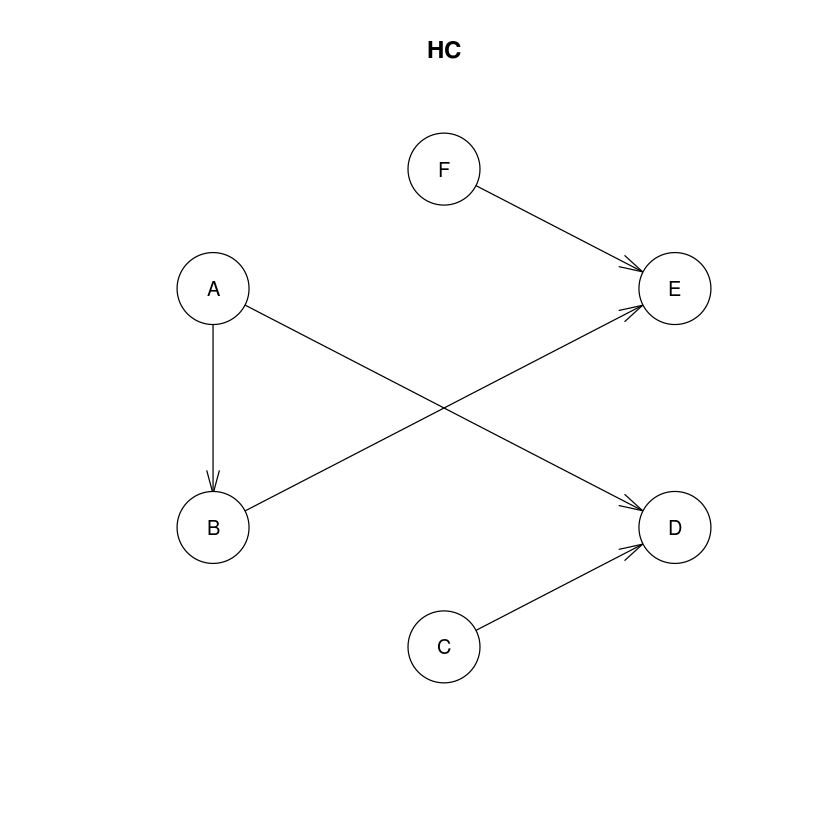

In [9]:
#Network Structure Learning
library(bnlearn)
data(learning.test)
df <- learning.test
head(df)
res <- hc(df)
plot(res, main = "HC")

In [10]:
#Estimete parameter
#各エッジごとに条件付き確率表が計算でできる
bn.fit(res, df,method = "mle")


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
      a      b      c 
0.3336 0.3340 0.3324 

  Parameters of node B (multinomial distribution)

Conditional probability table:
 
   A
B            a          b          c
  a 0.85611511 0.44491018 0.11492178
  b 0.02517986 0.22095808 0.09446450
  c 0.11870504 0.33413174 0.79061372

  Parameters of node C (multinomial distribution)

Conditional probability table:
      a      b      c 
0.7434 0.2048 0.0518 

  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , C = a

   A
D            a          b          c
  a 0.80081301 0.09251810 0.10530547
  b 0.09024390 0.80209171 0.11173633
  c 0.10894309 0.10539019 0.78295820

, , C = b

   A
D            a          b          c
  a 0.18079096 0.88304094 0.24695122
  b 0.13276836 0.07017544 0.49390244
  c 0.68644068 0.04678363 0.25914634

, , C = c

   A
D            a          b          c
  a 0.4